In [18]:
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\NDH00226\\Documents\\Syama\\My work\\Airbnb\\data\\Listings.csv", engine='python')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
df.describe()

listing_id       host_id  host_response_rate  host_acceptance_rate  \
count  2.797120e+05  2.797120e+05       150930.000000         166625.000000   
mean   2.638196e+07  1.081658e+08            0.865939              0.827168   
std    1.442576e+07  1.108570e+08            0.283744              0.289202   
min    2.577000e+03  1.822000e+03            0.000000              0.000000   
25%    1.384462e+07  1.720656e+07            0.900000              0.780000   
50%    2.767098e+07  5.826911e+07            1.000000              0.980000   
75%    3.978485e+07  1.832853e+08            1.000000              1.000000   
max    4.834353e+07  3.901874e+08            1.000000              1.000000   

       host_total_listings_count       latitude      longitude   accommodates  \
count              279547.000000  279712.000000  279712.000000  279712.000000   
mean                   24.581612      18.761862      12.595075       3.288736   
std                   284.041143      32.560343      73.081309       2.133379   
min                     0.000000     -34.264400     -99.339630       0.000000   
25%                     1.000000     -22.964390     -43.198040       2.000000   
50%                     1.000000      40.710785       2.382780       2.000000   
75%                     4.000000      41.908610      28.986730       4.000000   
max                  7235.000000      48.904910     151.339810      16.000000   

            bedrooms          price  minimum_nights  maximum_nights  \
count  250277.000000  279712.000000   279712.000000    2.797120e+05   
mean        1.515509     608.792737        8.050967    2.755860e+04   
std         1.153080    3441.826611       31.518946    7.282875e+06   
min         1.000000       0.000000        1.000000    1.000000e+00   
25%         1.000000      75.000000        1.000000    4.500000e+01   
50%         1.000000     150.000000        2.000000    1.125000e+03   
75%         2.000000     474.000000        5.000000    1.125000e+03   
max        50.000000  625216.000000     9999.000000    2.147484e+09   

       review_scores_rating  review_scores_accuracy  \
count         188307.000000           187999.000000   
mean              93.405195                9.565476   
std               10.070437                0.990878   
min               20.000000                2.000000   
25%               91.000000                9.000000   
50%               96.000000               10.000000   
75%              100.000000               10.000000   
max              100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count              188047.000000          187941.000000   
mean                    9.312869               9.701534   
std                     1.146072               0.867434   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                188025.000000           187937.000000   
mean                      9.698593                9.633994   
std                       0.886884                0.833234   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  
count        187927.000000  
mean              9.335364  
std               1.042625  
min               2.000000  
25%               9.000000  
50%              10.000000  
75%              10.000000  
max              10.000000

In [5]:
df = df.rename(columns = {'neighbourhood': 'neighbourhood_cleansed'}, inplace = False)

In [7]:
inter = ['host_since',
 'instant_bookable',
 'host_id',
 'neighbourhood_cleansed',
 'host_response_time',
 'bedrooms',
 'name',
 'room_type',
 'amenities',
 'review_scores_rating',
 'latitude',
 'listing_id',
 'price',
 'longitude',
 'accommodates',
 'property_type']

In [8]:
inputDF = df[inter]
# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

C:\Users\NDH00226\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()

host_since instant_bookable   host_id neighbourhood_cleansed  \
0  2011-12-03                f   1466919      Buttes-Montmartre   
1  2013-11-29                f  10328771      Buttes-Montmartre   
2  2014-07-31                f  19252768                 Elysee   
3  2013-12-17                f  10668311              Vaugirard   
4  2014-12-14                f  24837558                  Passy   

  host_response_time  bedrooms  \
0                  0       1.0   
1                  0       1.0   
2                  0       1.0   
3                  0       1.0   
4                  0       1.0   

                                               name     room_type  \
0    Beautiful Flat in le Village Montmartre, Paris  Entire place   
1                   39 mÃ‚Â² Paris (Sacre CÃ…â€œur)  Entire place   
2               Lovely apartment with Terrace, 60m2  Entire place   
3               Cosy studio (close to Eiffel tower)  Entire place   
4  Close to Eiffel Tower - Beautiful flat : 2 rooms  Entire place   

                                           amenities  review_scores_rating  \
0  ["Heating", "Kitchen", "Washer", "Wifi", "Long...                 100.0   
1  ["Shampoo", "Heating", "Kitchen", "Essentials"...                 100.0   
2  ["Heating", "TV", "Kitchen", "Washer", "Wifi",...                 100.0   
3  ["Heating", "TV", "Kitchen", "Wifi", "Long ter...                 100.0   
4  ["Heating", "TV", "Kitchen", "Essentials", "Ha...                 100.0   

   latitude  listing_id  price  longitude  accommodates     property_type  
0  48.88668      281420     53    2.33343             2  Entire apartment  
1  48.88617     3705183    120    2.34515             2  Entire apartment  
2  48.88112     4082273     89    2.31712             2  Entire apartment  
3  48.84571     4797344     58    2.30584             2  Entire apartment  
4  48.85500     4823489     60    2.26979             2  Entire apartment

In [10]:
roomType_DF=inputDF.groupby('room_type').host_id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'host_id':'number_Of_Listings'})
roomType_DF

room_type  number_Of_Listings
0  Entire place              114364
1    Hotel room                3525
2  Private room               48391
3   Shared room                2224

In [12]:
room = inputDF.room_type
r = Counter(room)

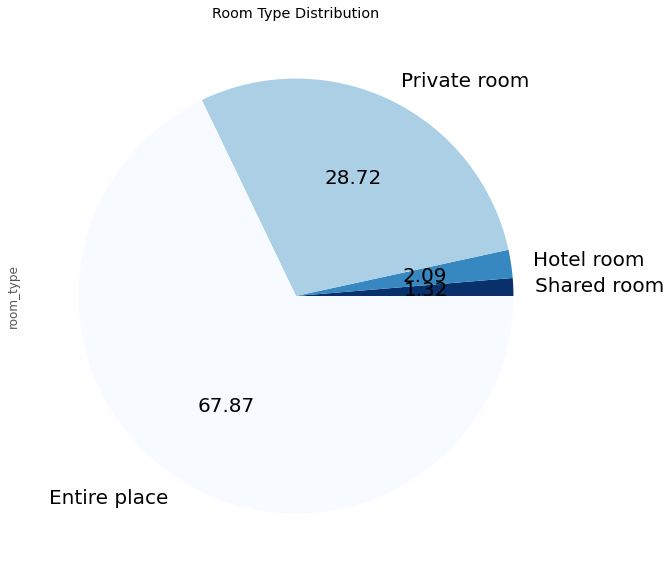

In [13]:
room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

In [14]:
propertytype_DF = inputDF.groupby('property_type').host_id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'host_id':'Number_Of_Listings'})

In [15]:
objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

Text(0, 0.5, 'Number of listings')

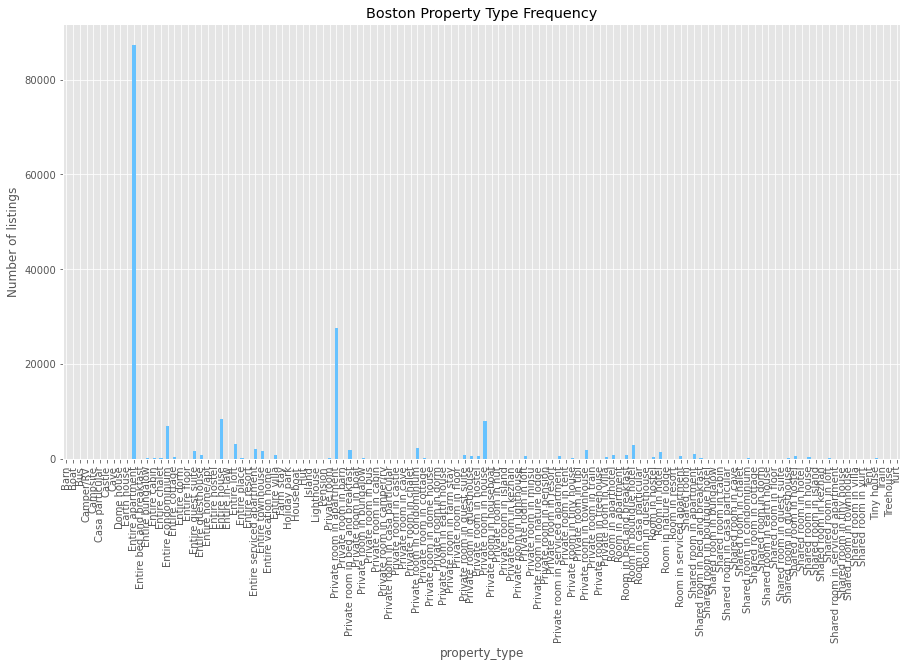

In [16]:
propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

In [17]:
roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

property_type     room_type        price
31        Entire villa  Entire place  5930.907117
6               Castle  Entire place  3048.000000
1                 Boat  Entire place  2148.531250
90  Room in guesthouse    Hotel room  1800.000000
12     Entire bungalow  Entire place  1697.885542

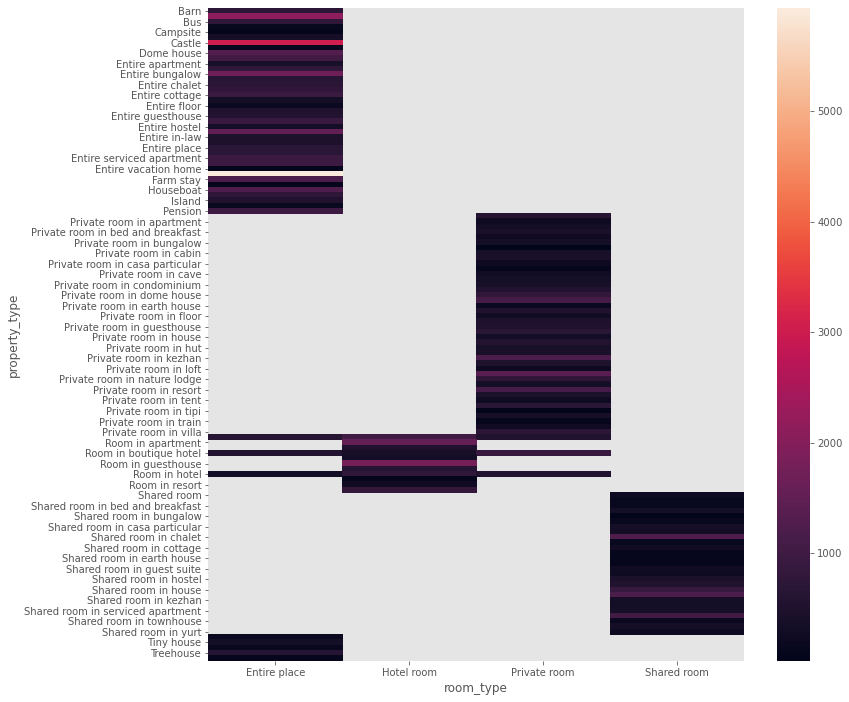

In [105]:
plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby([
        'property_type', 'room_type']).price.mean().unstack(),annot=False, fmt=".0f")

In [20]:
avgPrice_DF=inputDF.groupby('room_type').price.mean()
avgPrice_DF=avgPrice_DF.reset_index()
avgPrice_DF=avgPrice_DF.rename(columns={'price':'average_Price'})
avgPrice_DF

room_type  average_Price
0  Entire place     578.255832
1    Hotel room     595.860426
2  Private room     308.852039
3   Shared room     331.661871

In [21]:
home = inputDF[(inputDF.room_type == 'Entire place')]
private = inputDF[(inputDF.room_type == 'Private room')]
shared = inputDF[(inputDF.room_type == 'Shared room')]

In [22]:
location_home = home[['latitude', 'longitude']]
location_private = private[['latitude', 'longitude']]
location_shared = shared[['latitude', 'longitude']]

In [23]:


# optional plot if you have gmap API keys You can run this 

from bokeh.io import push_notebook, show, output_notebook
import os

from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, Range1d, PanTool, WheelZoomTool, BoxSelectTool
)
output_notebook()
map_options = GMapOptions(lat=42.3318, lng=-71.1212, map_type="roadmap", zoom=11)

plot = GMapPlot(
    x_range=Range1d(), y_range=Range1d(), map_options=map_options,width=1200, height=750
)
plot.title.text = "Paris"

# plot.api_key = os.environ['data_download_key']

source = ColumnDataSource(
    data=dict(
        lat_home=location_home['latitude'],
        lon_home=location_home['longitude'],
        lat_private=location_private['latitude'],
        lon_private=location_private['longitude'],
        lat_shared=location_shared['latitude'],
        lon_shared=location_shared['longitude']
    )
)


circle_home = Circle(x="lon_home", y="lat_home", size=4, fill_color="blue", fill_alpha=0.9, line_color=None)
circle_private =  Circle(x="lon_private", y="lat_private", size=4, fill_color="red", fill_alpha=0.9, line_color=None)
circle_shared =  Circle(x="lon_shared", y="lat_shared", size=4, fill_color="#006600", fill_alpha=0.9, line_color=None)

plot.add_glyph(source, circle_home)
plot.add_glyph(source, circle_private)
plot.add_glyph(source, circle_shared)

plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool())
show(plot)


Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1005 (MISSING_GOOGLE_API_KEY): Google now requires API keys for all Google Maps usage: GMapPlot(id='1005', ...)


In [24]:
# grouping neighbourhood by number of listings

neighbourhood_DF=home.groupby('neighbourhood_cleansed').listing_id.count()
neighbourhood_DF=neighbourhood_DF.reset_index()
neighbourhood_DF=neighbourhood_DF.rename(columns={'listing_id':'Number_Of_Listings'})
neighbourhood_DF=neighbourhood_DF.sort_values('Number_Of_Listings',ascending=[0])
neighbourhood_DF.head()

neighbourhood_cleansed  Number_Of_Listings
219       I Centro Storico                7911
78       Buttes-Montmartre                3842
126             Cuauhtemoc                3840
119             Copacabana                3761
353             Popincourt                3308

In [25]:
# grouping neighbourhood by average price of listings

neighbourhoodPrice_DF=home.groupby('neighbourhood_cleansed').price.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()


neighbourhood_cleansed  Average_Price
435            Taling Chan   19598.600000
457               Tuen Mun   16099.500000
317              Nong Chok    6535.666667
264              Lat Phrao    4809.090909
521                Ward 54    4437.751696

In [26]:
#Merging above two dataframes

mergeDF=pd.merge(neighbourhood_DF,neighbourhoodPrice_DF,on='neighbourhood_cleansed')
mergeDF.head()

neighbourhood_cleansed  Number_Of_Listings  Average_Price
0       I Centro Storico                7911     122.340033
1      Buttes-Montmartre                3842      98.097345
2             Cuauhtemoc                3840    1348.905208
3             Copacabana                3761     489.975538
4             Popincourt                3308     102.855804

In [41]:
# visualizing the frequency of listings on the basis of neighbourhood where room type is entire apartment
objects = neighbourhood_DF['neighbourhood_cleansed']
y_pos = neighbourhood_DF['Number_Of_Listings']

neighbourhood_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(200,100), 
           title = 'Paris Neighborhood Frequency', 
           legend = False)

plt.ylabel('Number Of Listings')



Text(0, 0.5, 'Number Of Listings')

In [28]:
objects = neighbourhoodPrice_DF['neighbourhood_cleansed']
y_pos = neighbourhoodPrice_DF['Average_Price']


In [51]:

neighbourhoodPrice_DF.plot(kind='bar', 
           x='neighbourhood_cleansed',
           y='Average_Price',
           color = '#66c2ff', 
           figsize =(300,150), 
           title = 'Paris Neighborhood Average price', 
           legend = False)
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

In [42]:
df = df.rename(columns = {'id': 'listing_id'}, inplace = False)
df = df.rename(columns = {'host_since': 'date'}, inplace = False)

In [43]:
calendarDF = df.copy()

In [44]:
calendarDF = calendarDF.dropna()

In [45]:
#separating date column into day month and year
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
calendarDF.head()

<ipython-input-45-c5a9599fcd27>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str


listing_id                                               name  \
26276    42449656          Romantic studio in New York best Bushwick   
26277    44358310  Stunning Corner luxurious 1 bed+office RH +30 day   
26320      457829    Beautiful apartment in the heart of The Village   
26321     4956469  Contemporary & Clean 1 bdrm Apartment(Lower Le...   
26322     7962707                  SPACIOUS APT CLOSE TO MANHATTAN!!   

         host_id        date                       host_location  \
26276  308165996  2019-11-08   New York, New York, United States   
26277  301703046  2019-10-11  Boca Raton, Florida, United States   
26320    2275829  2012-05-02                 Manhattan, New York   
26321   25537637  2015-01-03     Queens, New York, United States   
26322   42008401  2015-08-20   New York, New York, United States   

      host_response_time  host_response_rate  host_acceptance_rate  \
26276     within an hour                 1.0                   1.0   
26277     within an hour                 1.0                   1.0   
26320       within a day                 1.0                   1.0   
26321     within an hour                 1.0                   1.0   
26322     within an hour                 1.0                   1.0   

      host_is_superhost  host_total_listings_count  ...  \
26276                 f                        1.0  ...   
26277                 f                        1.0  ...   
26320                 f                        1.0  ...   
26321                 f                        1.0  ...   
26322                 f                        1.0  ...   

      review_scores_accuracy review_scores_cleanliness review_scores_checkin  \
26276                   10.0                      10.0                  10.0   
26277                    8.0                       8.0                   8.0   
26320                    9.0                       9.0                   9.0   
26321                    9.0                       9.0                  10.0   
26322                   10.0                       9.0                  10.0   

      review_scores_communication review_scores_location  review_scores_value  \
26276                         8.0                   10.0                  9.0   
26277                         7.0                    9.0                  7.0   
26320                         9.0                   10.0                  9.0   
26321                         9.0                    9.0                  9.0   
26322                         9.0                    9.0                 10.0   

       instant_bookable  Year Month  Day  
26276                 f  2019    11   08  
26277                 f  2019    10   11  
26320                 t  2012    05   02  
26321                 t  2015    01   03  
26322                 t  2015    08   20  

[5 rows x 36 columns]

In [46]:
yearDF=calendarDF.groupby(['Year','Month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['Year'].map(str) + "-" + yearDF['Month'].map(str)

yearDF.head()

Year Month  average_Price year-Month
0  2008    08         117.00    2008-08
1  2008    09          91.75    2008-09
2  2008    10          97.50    2008-10
3  2008    11          86.50    2008-11
4  2008    12         106.00    2008-12

In [47]:
indexNames = calendarDF[ calendarDF['Year'] == 0 ].index
# Delete these row indexes from dataFrame
calendarDF.drop(indexNames , inplace=True)

Text(0, 0.5, 'Average Price')

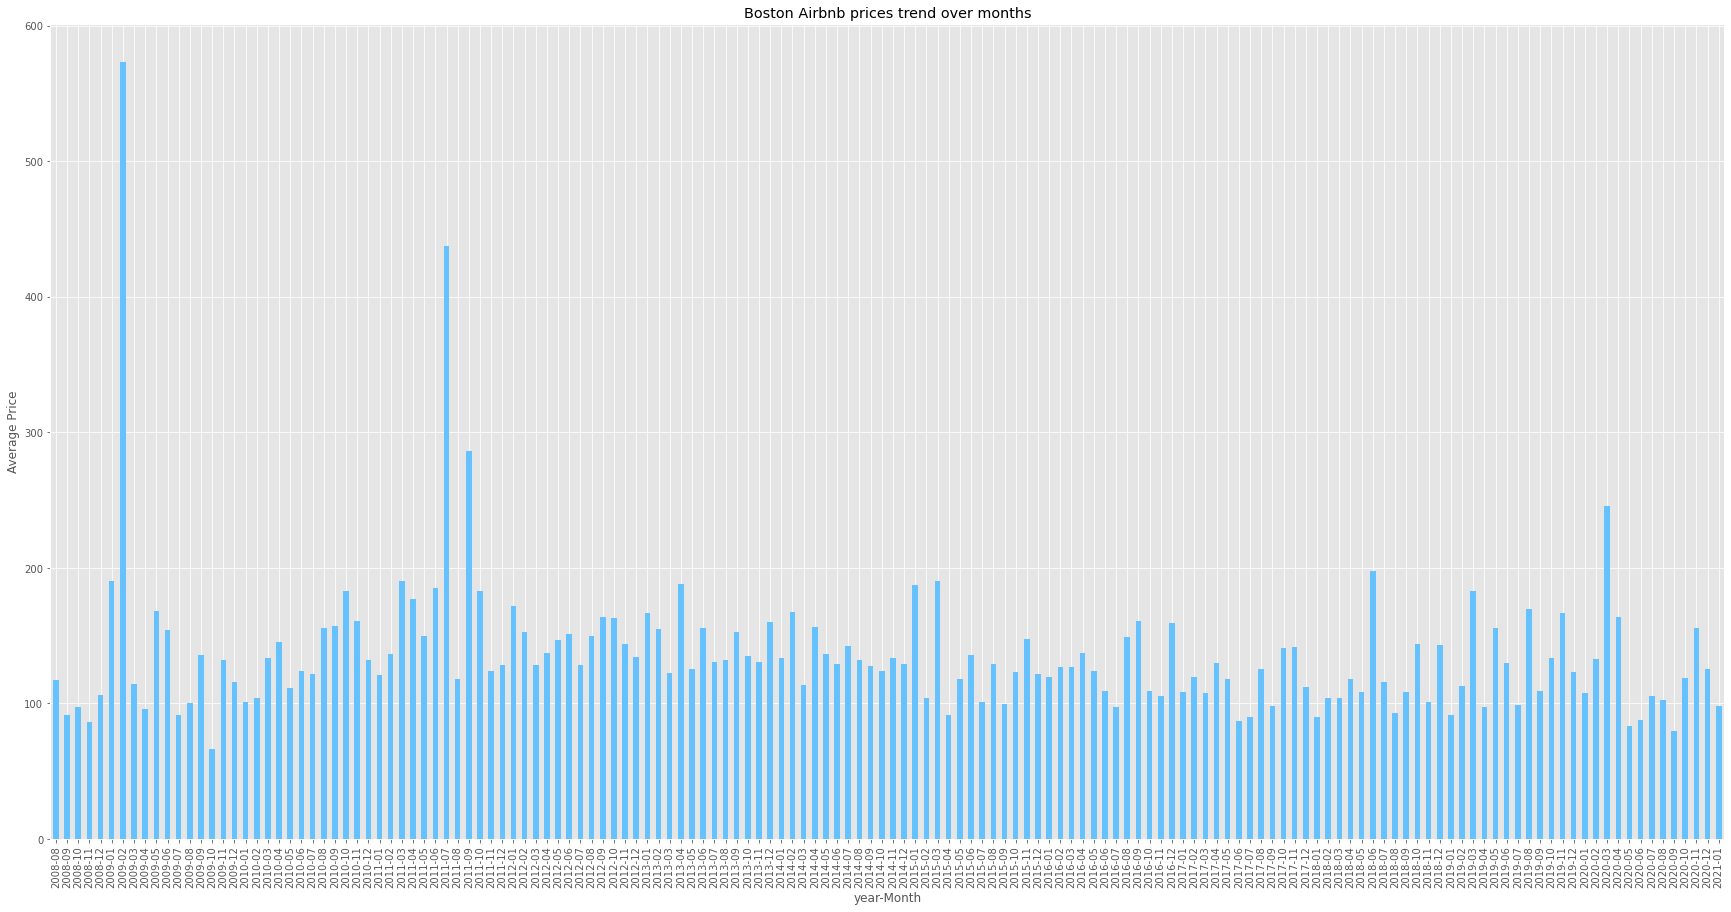

In [49]:
yearDF.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = '#66c2ff', 
           figsize =(30,15), 
           title = 'Boston Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')

In [84]:
#getting day name from date data and holidays

from datetime import date
import datetime
import calendar
import holidays

In [90]:
calendarDF.fillna(0, inplace=True)
us_holidays = holidays.US()

calendarDF['day_Name']='default'
calendarDF['holiday']='False'
calendarDF['us_holidays_name']='working'
for index,row in calendarDF.iterrows():
    sdate = datetime.date(int(row['Year']),int(row['Month']),int(row['Day']))
    vall=date(int(row['Year']),int(row['Month']),int(row['Day'])) in us_holidays
    calendarDF.at[index,'day_Name'] = calendar.day_name[sdate.weekday()]
    calendarDF.at[index,'holiday'] = vall
    calendarDF.at[index,'us_holidays_name'] = us_holidays.get(sdate)
calendarDF.head()

listing_id                                               name  \
26276    42449656          Romantic studio in New York best Bushwick   
26277    44358310  Stunning Corner luxurious 1 bed+office RH +30 day   
26320      457829    Beautiful apartment in the heart of The Village   
26321     4956469  Contemporary & Clean 1 bdrm Apartment(Lower Le...   
26322     7962707                  SPACIOUS APT CLOSE TO MANHATTAN!!   

         host_id        date                       host_location  \
26276  308165996  2019-11-08   New York, New York, United States   
26277  301703046  2019-10-11  Boca Raton, Florida, United States   
26320    2275829  2012-05-02                 Manhattan, New York   
26321   25537637  2015-01-03     Queens, New York, United States   
26322   42008401  2015-08-20   New York, New York, United States   

      host_response_time  host_response_rate  host_acceptance_rate  \
26276     within an hour                 1.0                   1.0   
26277     within an hour                 1.0                   1.0   
26320       within a day                 1.0                   1.0   
26321     within an hour                 1.0                   1.0   
26322     within an hour                 1.0                   1.0   

      host_is_superhost  host_total_listings_count  ...  \
26276                 f                        1.0  ...   
26277                 f                        1.0  ...   
26320                 f                        1.0  ...   
26321                 f                        1.0  ...   
26322                 f                        1.0  ...   

      review_scores_location review_scores_value instant_bookable  Year Month  \
26276                   10.0                 9.0                f  2019    11   
26277                    9.0                 7.0                f  2019    10   
26320                   10.0                 9.0                t  2012    05   
26321                    9.0                 9.0                t  2015    01   
26322                    9.0                10.0                t  2015    08   

       Day   day_Name holiday us_holidays_name  fr_holidays_name  
26276   08     Friday   False             None           working  
26277   11     Friday   False             None           working  
26320   02  Wednesday   False             None           working  
26321   03   Saturday   False             None           working  
26322   20   Thursday   False             None           working  

[5 rows x 40 columns]

In [91]:
#calculating Average price for each day

dayDF=calendarDF.groupby('day_Name').price.mean()
dayDF=dayDF.reset_index()
dayDF['day_num']=0

In [92]:
for index,row in dayDF.iterrows():
    if row['day_Name']=='Monday':
        dayDF.at[index,'day_num']=1
    if row['day_Name']=='Tuesday':
        dayDF.at[index,'day_num']=2
    if row['day_Name']=='Wednesday':
        dayDF.at[index,'day_num']=3
    if row['day_Name']=='Thursday':
        dayDF.at[index,'day_num']=4
    if row['day_Name']=='Friday':
        dayDF.at[index,'day_num']=5
    if row['day_Name']=='Saturday':
        dayDF.at[index,'day_num']=6
    if row['day_Name']=='Sunday':
        dayDF.at[index,'day_num']=7
dayDF=dayDF.sort_values('day_num',ascending=[1])
dayDF=dayDF.rename(columns={'price':'Average_Price'})
dayDF

day_Name  Average_Price  day_num
1     Monday     142.387160        1
5    Tuesday     137.034068        2
6  Wednesday     129.267560        3
4   Thursday     127.832470        4
0     Friday     126.422925        5
2   Saturday     135.772142        6
3     Sunday     129.300147        7

In [93]:
#checking which holiday has maximum listings

holidayDF=calendarDF.groupby('us_holidays_name').listing_id.count()
holidayDF=holidayDF.reset_index()
holidayDF=holidayDF.sort_values('listing_id',ascending=[0])
holidayDF

us_holidays_name  listing_id
2                  Columbus Day          79
6    Martin Luther King Jr. Day          49
7                  Memorial Day          37
11                 Veterans Day          35
5                     Labor Day          26
3              Independence Day          25
9     New Year's Day (Observed)          20
0                 Christmas Day          19
8                New Year's Day          18
13        Washington's Birthday          16
10                 Thanksgiving          13
12      Veterans Day (Observed)          10
4   Independence Day (Observed)           7
1      Christmas Day (Observed)           5

[Text(0, 0.5, 'Total Number of Listings'), Text(0.5, 0, 'US Holidays Name')]

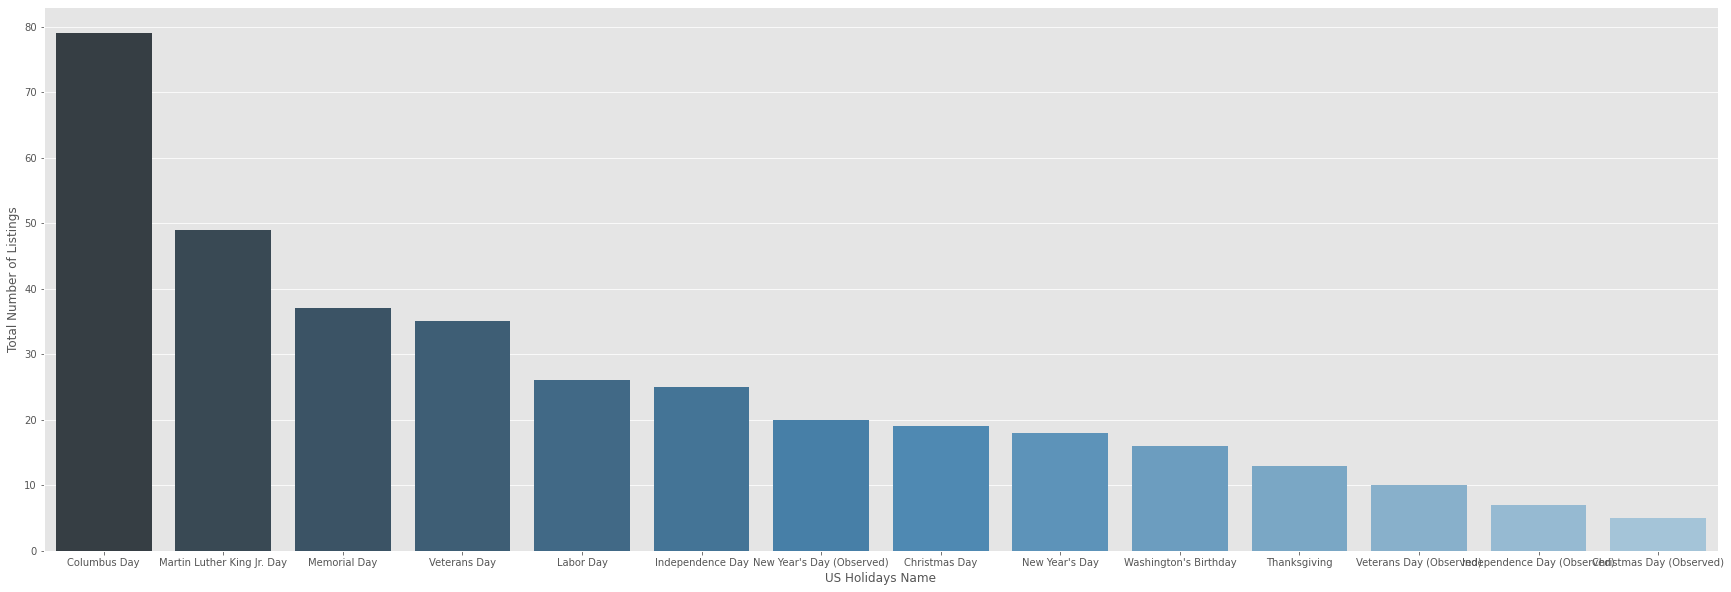

In [94]:
plt.figure(figsize=(30,10))
ax = sns.barplot("us_holidays_name", y="listing_id", data=holidayDF,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Total Number of Listings')


#It can be seen that the maximum number of listings is for Columbus Day which can be reasoned as its a very popular holiday.Lets dig in further to find which holiday has the maximum average price.


In [96]:
holidayPriceDF=calendarDF.groupby('us_holidays_name').price.mean()
holidayPriceDF=holidayPriceDF.reset_index()
holidayPriceDF=holidayPriceDF.sort_values('price',ascending=[0])

In [97]:
holidayPriceDF.head(10)


us_holidays_name       price
8              New Year's Day  176.833333
10               Thanksgiving  168.076923
9   New Year's Day (Observed)  162.750000
12    Veterans Day (Observed)  156.900000
0               Christmas Day  154.789474
2                Columbus Day  143.632911
3            Independence Day  130.160000
1    Christmas Day (Observed)  128.000000
13      Washington's Birthday  105.562500
5                   Labor Day  103.961538

[Text(0, 0.5, 'Average Price'), Text(0.5, 0, 'US Holidays Name')]

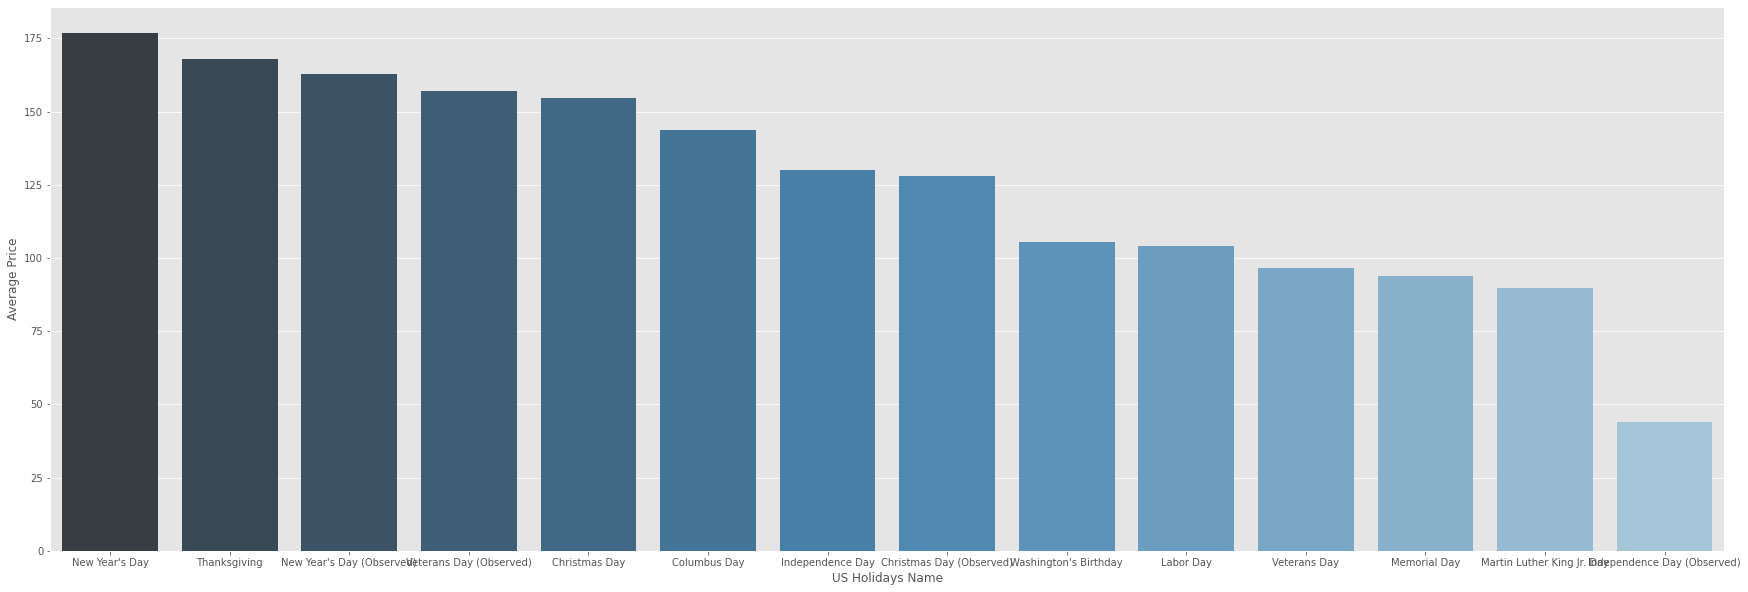

In [98]:
plt.figure(figsize=(30,10))
ax = sns.barplot("us_holidays_name", y="price", data=holidayPriceDF,palette="Blues_d")
ax.set(xlabel='US Holidays Name', ylabel='Average Price')

In [99]:
merger=pd.merge(holidayDF,holidayPriceDF,on='us_holidays_name')
merger=merger.rename(columns={'listing_id':'number_Of_Listings'})
merger=merger.rename(columns={'price':'average_Price'})
merger

us_holidays_name  number_Of_Listings  average_Price
0                  Columbus Day                  79     143.632911
1    Martin Luther King Jr. Day                  49      89.673469
2                  Memorial Day                  37      93.783784
3                  Veterans Day                  35      96.485714
4                     Labor Day                  26     103.961538
5              Independence Day                  25     130.160000
6     New Year's Day (Observed)                  20     162.750000
7                 Christmas Day                  19     154.789474
8                New Year's Day                  18     176.833333
9         Washington's Birthday                  16     105.562500
10                 Thanksgiving                  13     168.076923
11      Veterans Day (Observed)                  10     156.900000
12  Independence Day (Observed)                   7      44.000000
13     Christmas Day (Observed)                   5     128.000000

In [100]:
#graph shows count of host registered everyday by resampling the data for each day

Text(0, 0.5, 'number of hosts')

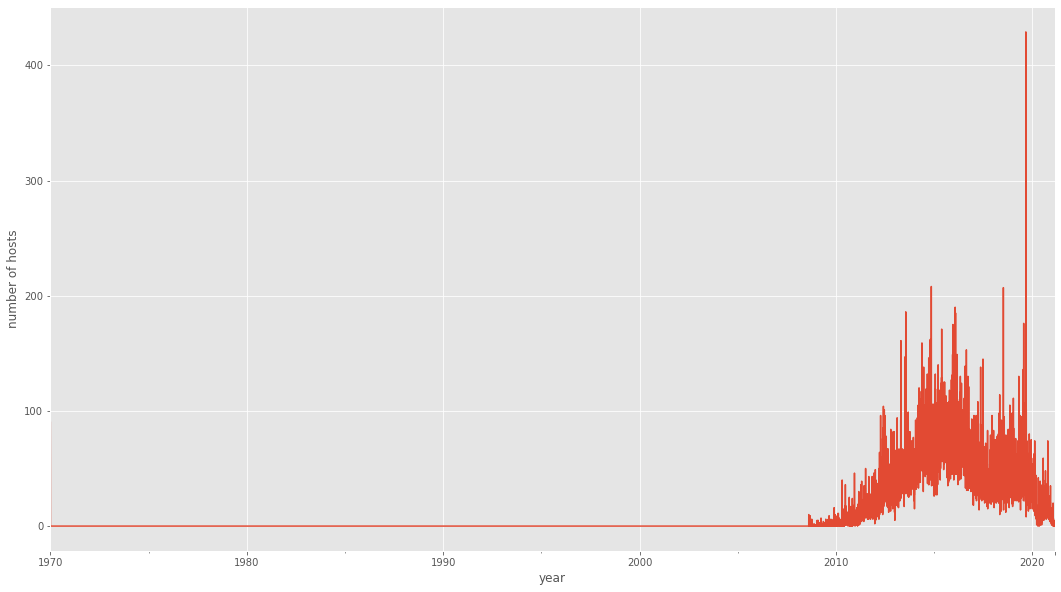

In [101]:
plt.figure(figsize=(18,10))
join_dates = pd.to_datetime(inputDF['host_since']).value_counts().resample('D').mean().fillna(0)
join_dates.plot()
plt.xlabel('year')
plt.ylabel('number of hosts')

Text(0, 0.5, 'Number of hosts')

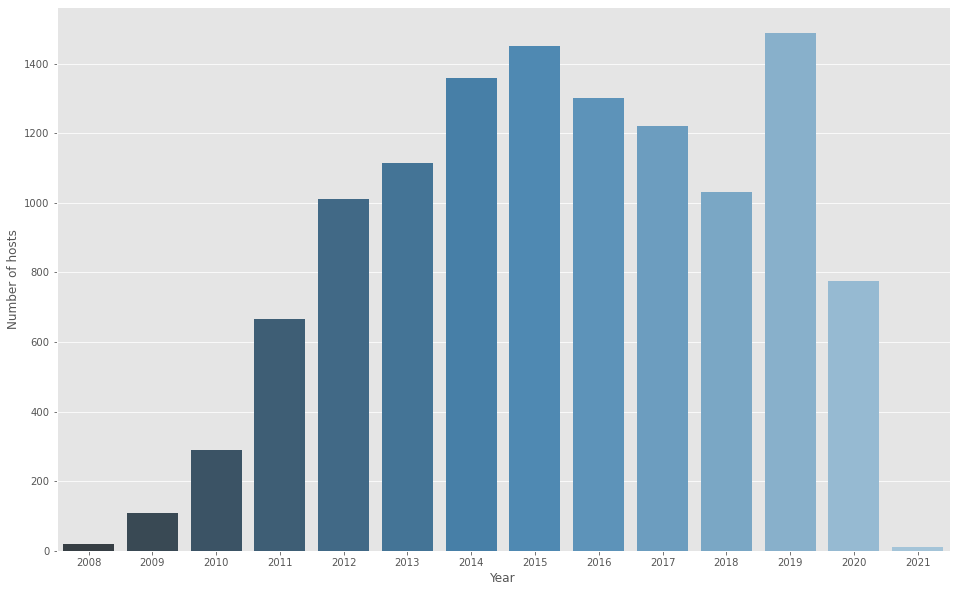

In [102]:
plt.figure(figsize=(16,10))
yearDF=calendarDF.groupby(['Year']).listing_id.count()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'listing_id':'Number of hosts'})
ax = sns.barplot(x='Year', y="Number of hosts", data=yearDF,palette="Blues_d")
plt.ylabel('Number of hosts')

It can be analyzed that Most of the hosts registered in the year 2019.Lets analyze the months


Text(0, 0.5, 'Number of hosts')

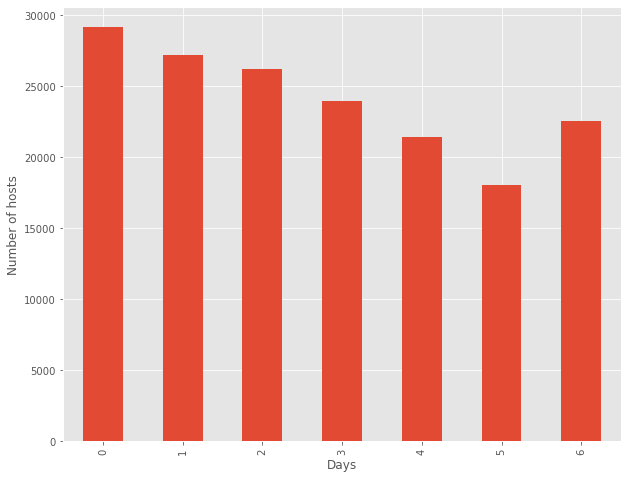

In [103]:
plt.figure(figsize=(10,8))
pd.to_datetime(inputDF['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')
plt.xlabel("Days")
plt.ylabel("Number of hosts")


In [104]:

# splitting the amenities list to count the number of amenities
amenities_list = []

for element in inputDF.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

inputDF.amenities = amenities_list
inputDF.head()


host_since instant_bookable   host_id neighbourhood_cleansed  \
0  2011-12-03                f   1466919      Buttes-Montmartre   
1  2013-11-29                f  10328771      Buttes-Montmartre   
2  2014-07-31                f  19252768                 Elysee   
3  2013-12-17                f  10668311              Vaugirard   
4  2014-12-14                f  24837558                  Passy   

  host_response_time  bedrooms  \
0                  0       1.0   
1                  0       1.0   
2                  0       1.0   
3                  0       1.0   
4                  0       1.0   

                                               name     room_type  amenities  \
0    Beautiful Flat in le Village Montmartre, Paris  Entire place          8   
1                   39 mÃ‚Â² Paris (Sacre CÃ…â€œur)  Entire place         11   
2               Lovely apartment with Terrace, 60m2  Entire place          9   
3               Cosy studio (close to Eiffel tower)  Entire place          8   
4  Close to Eiffel Tower - Beautiful flat : 2 rooms  Entire place         17   

   review_scores_rating  latitude  listing_id  price  longitude  accommodates  \
0                 100.0  48.88668      281420     53    2.33343             2   
1                 100.0  48.88617     3705183    120    2.34515             2   
2                 100.0  48.88112     4082273     89    2.31712             2   
3                 100.0  48.84571     4797344     58    2.30584             2   
4                 100.0  48.85500     4823489     60    2.26979             2   

      property_type  
0  Entire apartment  
1  Entire apartment  
2  Entire apartment  
3  Entire apartment  
4  Entire apartment